<h2>House Price Prediction</h2>
<h4>The house price model is based on a demand function for housing services and a standard, life-cycle model of utility for a representative household. This is a common approach in academic research into house prices..</h4>

<ul>
<li>Price - Total cost of house on the basis of requirments</li>
<li>Area - Total area of house in sq.ft.</li>
<li>Bedroom - Total number of bedrooms in house</li>
<li>Bathrooms - Total number of bathrooms in house </li>
<li>Floors - Total Floors in house</li>
<li>Road - House Having mainroad or not</li>
<li>Guestroom - House have guestroom or not</li>
<li>Basement - House is having a basement or not</li>
<li>Geyser - Have geyser Facility or not</li>
<li>Ac - Having Ac Facility or not</li>
<li>PrefAr - House have preference area or not</li>
<li>FurnishingStat - Furnishing status of house</li>
</ul>
<h4>Module Used</h4>
<ul>
    <li>Pandas</li>
    <li>Seaborn</li>
    <li>Scikit Learn</li>
    <li>Matplotlib</li>
    <li>Scipy</li>
</ul>

<h3>Importing module</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

<h3>Importing Dataset</h3>

In [2]:
#Importing housing Dataset
data = pd.read_csv('Housing.csv',index_col=0)
data

,Price,Area,Bedroom,Bathroom,Floors,Road,GuestRoom,Basement,Geyser,Ac,ParkingLot,PrefAr,FurnishingStat
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data 

,Price,Area,Bedroom,Bathroom,Floors,Road,GuestRoom,Basement,Geyser,Ac,ParkingLot,PrefAr,FurnishingStat
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.head()

,Price,Area,Bedroom,Bathroom,Floors,Road,GuestRoom,Basement,Geyser,Ac,ParkingLot,PrefAr,FurnishingStat
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<h3>Description</h3>

In [5]:
data.describe

<bound method NDFrame.describe of         Price  Area  Bedroom  Bathroom  Floors Road GuestRoom Basement Geyser  \
0    13300000  7420        4         2       3  yes        no       no     no   
1    12250000  8960        4         4       4  yes        no       no     no   
2    12250000  9960        3         2       2  yes        no      yes     no   
3    12215000  7500        4         2       2  yes        no      yes     no   
4    11410000  7420        4         1       2  yes       yes      yes     no   
..        ...   ...      ...       ...     ...  ...       ...      ...    ...   
540   1820000  3000        2         1       1  yes        no      yes     no   
541   1767150  2400        3         1       1   no        no       no     no   
542   1750000  3620        2         1       1  yes        no       no     no   
543   1750000  2910        3         1       1   no        no       no     no   
544   1750000  3850        3         1       2  yes        no       no     

In [6]:
data.isnull().sum()

Price             0
Area              0
Bedroom           0
Bathroom          0
Floors            0
Road              0
GuestRoom         0
Basement          0
Geyser            0
Ac                0
ParkingLot        0
PrefAr            0
FurnishingStat    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           545 non-null    int64 
 1   Area            545 non-null    int64 
 2   Bedroom         545 non-null    int64 
 3   Bathroom        545 non-null    int64 
 4   Floors          545 non-null    int64 
 5   Road            545 non-null    object
 6   GuestRoom       545 non-null    object
 7   Basement        545 non-null    object
 8   Geyser          545 non-null    object
 9   Ac              545 non-null    object
 10  ParkingLot      545 non-null    int64 
 11  PrefAr          545 non-null    object
 12  FurnishingStat  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


<h3>Preforming conversion on categorical Feature</h3>

In [8]:
#Performing Labelencoding conversion
from sklearn.preprocessing import LabelEncoder
categ = ['Road', 'GuestRoom','Basement', 'Geyser', 'Ac', 'PrefAr', 'FurnishingStat']

# Encode Categorical
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [9]:
data

,Price,Area,Bedroom,Bathroom,Floors,Road,GuestRoom,Basement,Geyser,Ac,ParkingLot,PrefAr,FurnishingStat
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


<h3>Checking for outliers</h3>

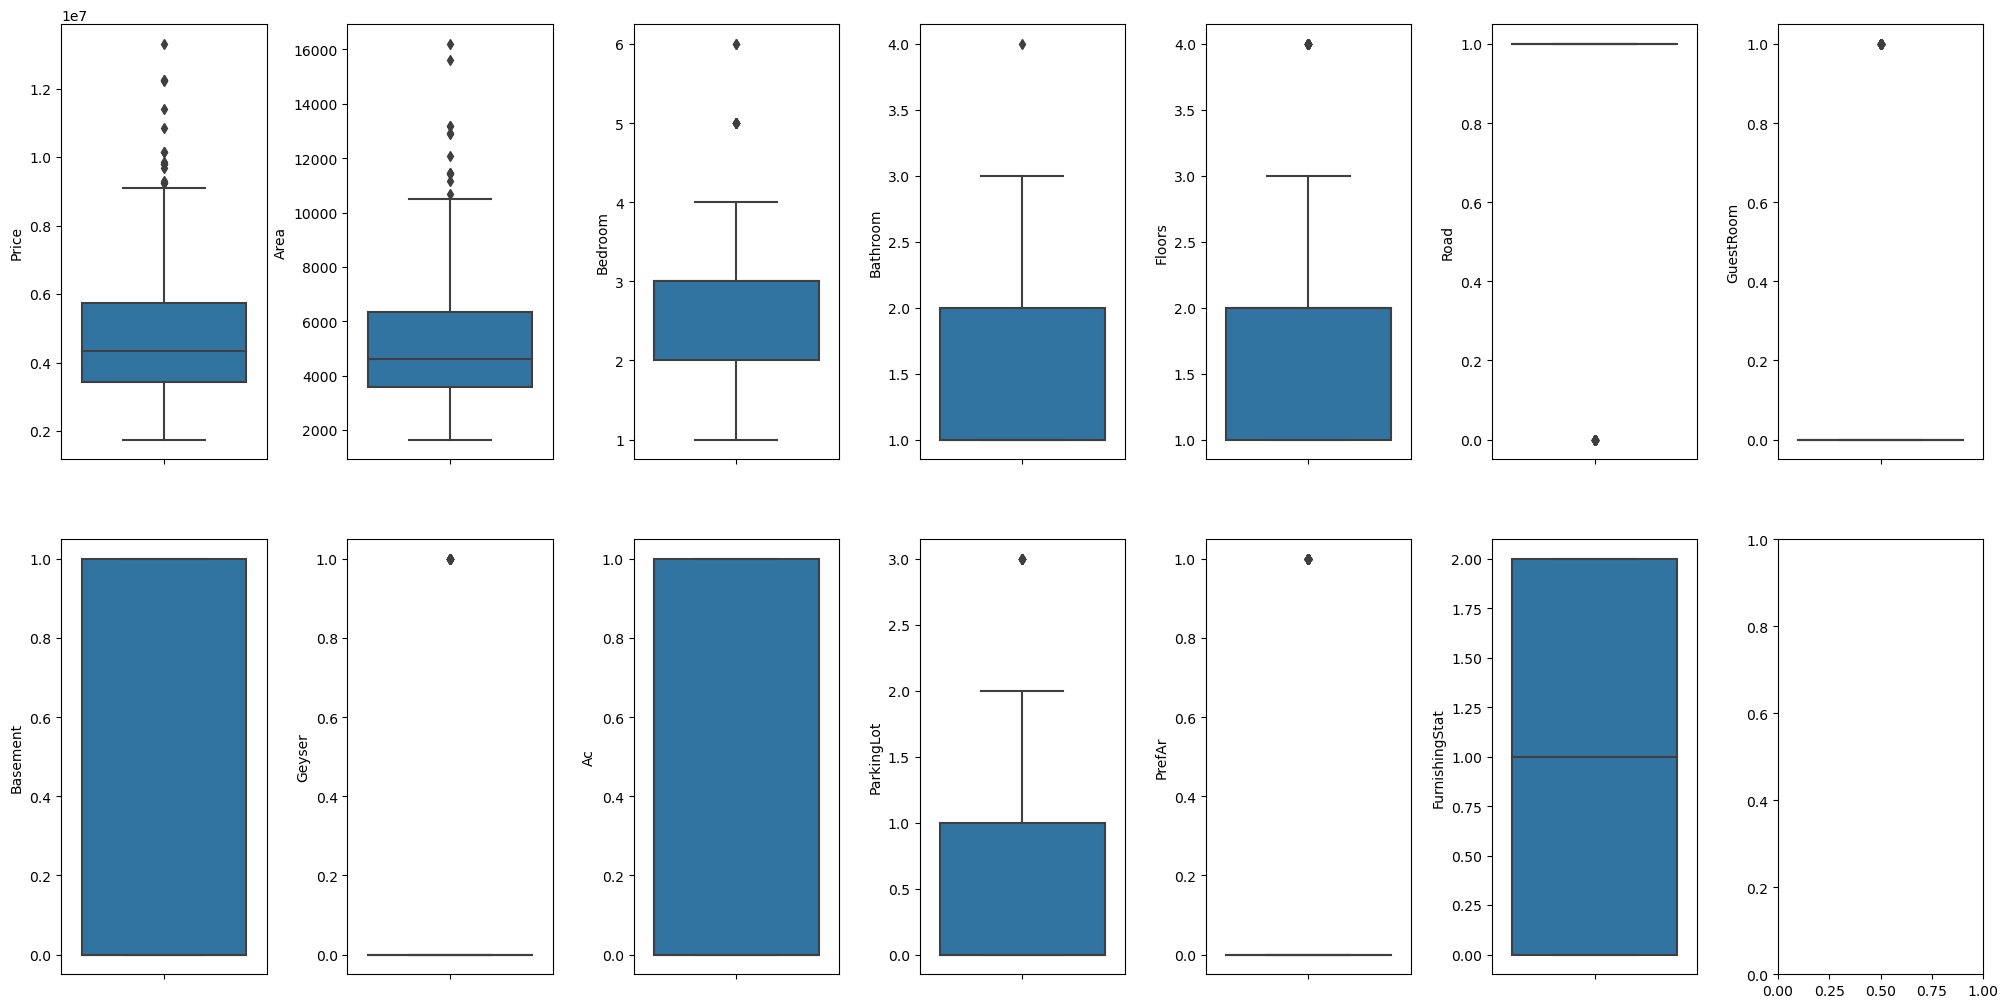

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

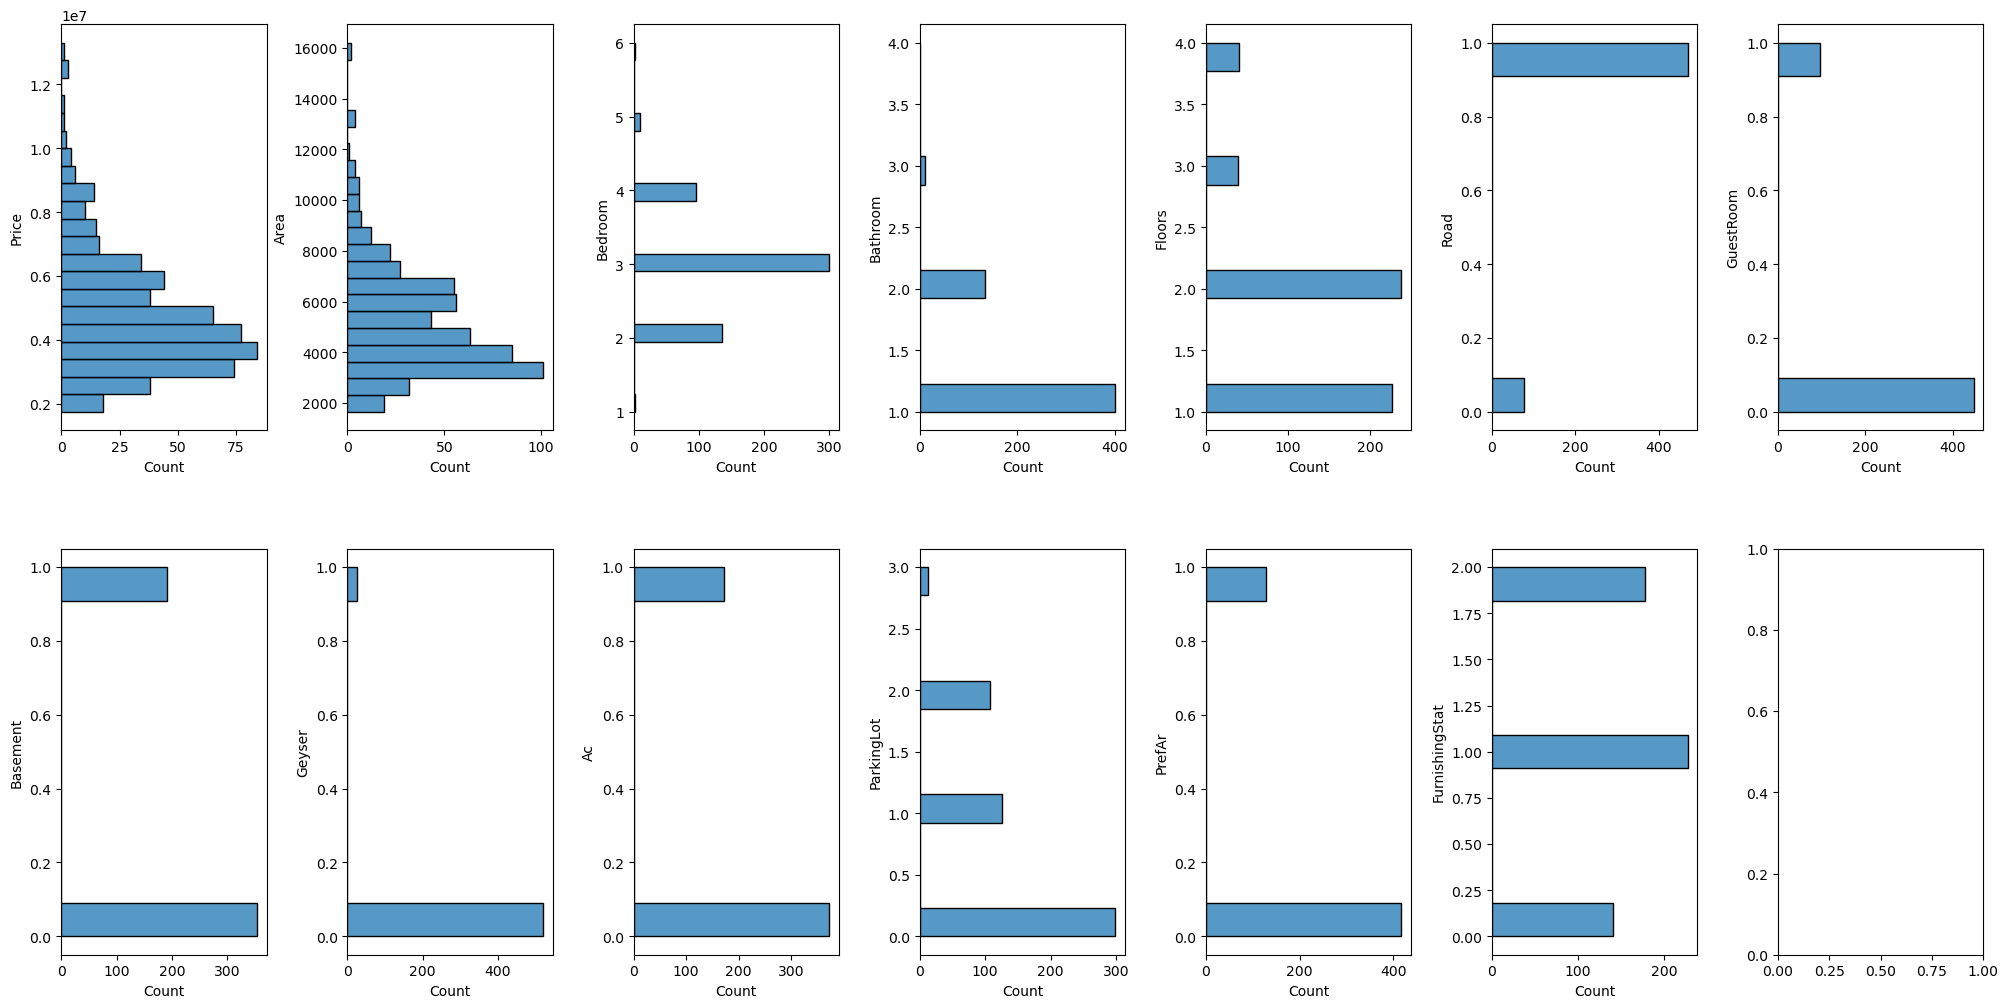

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [12]:
for g,v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (g, perc))

Column Price outliers = 2.75%
Column Area outliers = 2.75%
Column Bedroom outliers = 2.20%
Column Bathroom outliers = 0.18%
Column Floors outliers = 7.52%
Column Road outliers = 100.00%
Column GuestRoom outliers = 100.00%
Column Basement outliers = 0.00%
Column Geyser outliers = 100.00%
Column Ac outliers = 0.00%
Column ParkingLot outliers = 2.20%
Column PrefAr outliers = 100.00%
Column FurnishingStat outliers = 0.00%


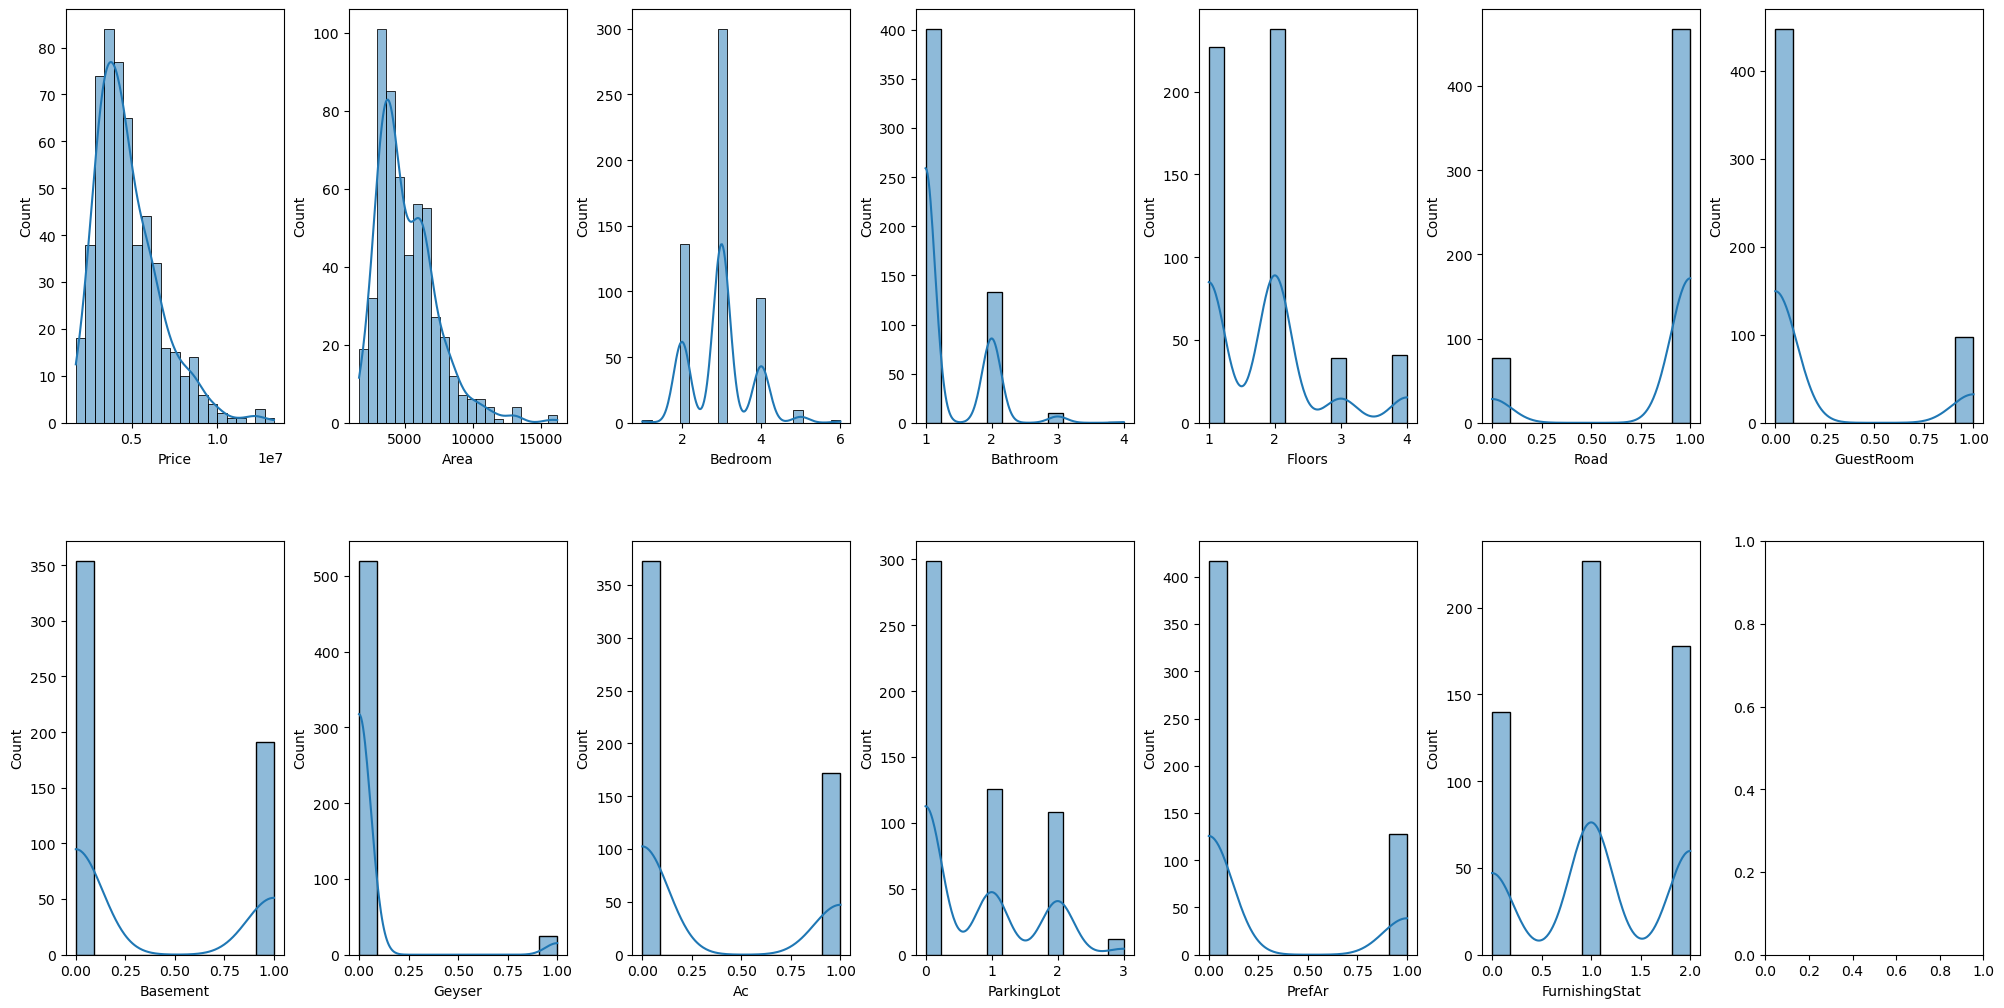

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index] ,kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<h3>Heatmap of Correlation of dataset</h3>

<Axes: >

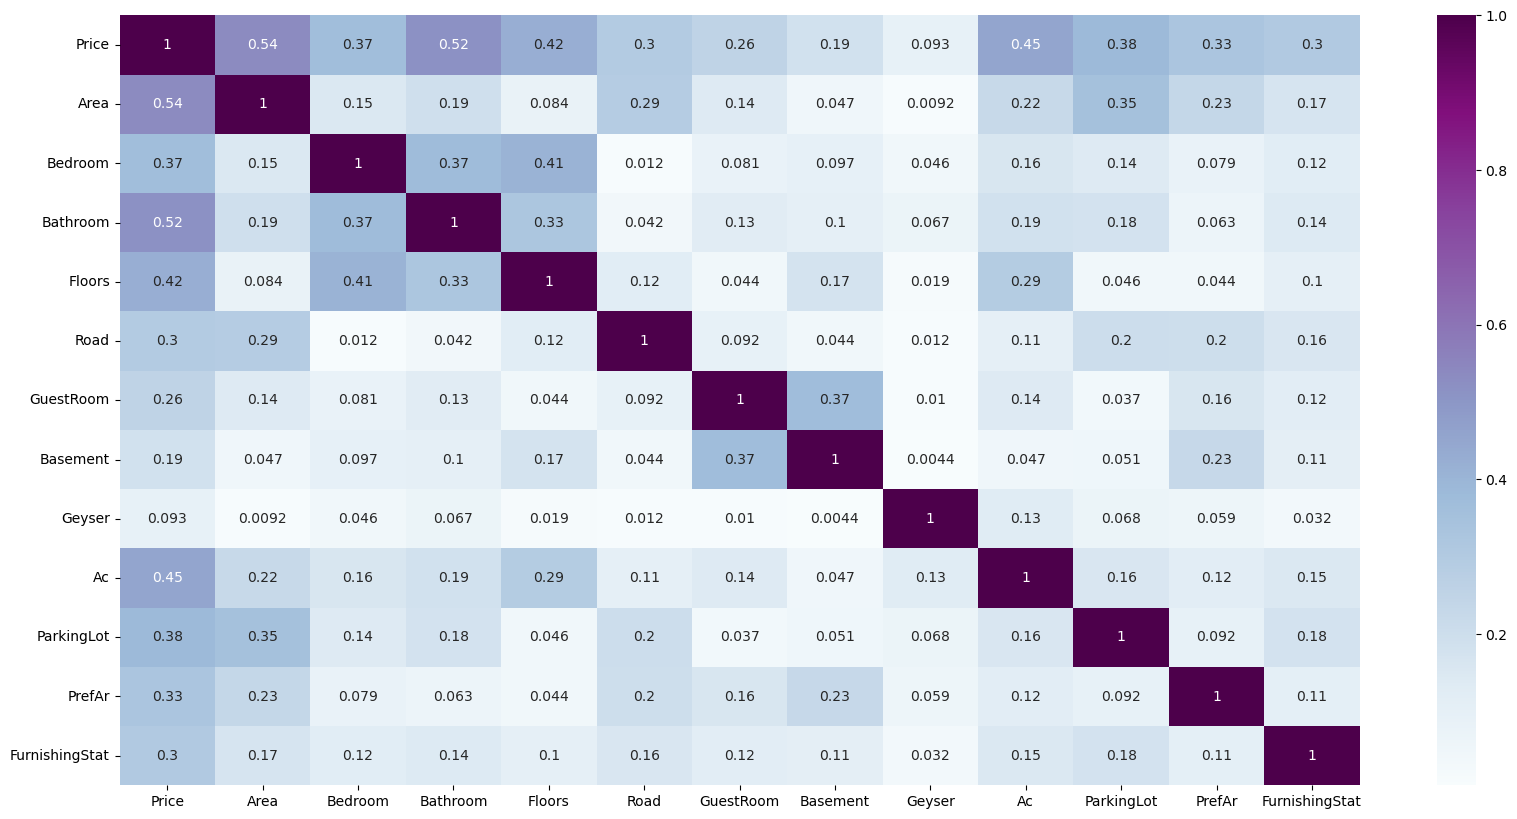

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),cmap='BuPu',annot=True)

<h3>Extracting target column from dataset</h3>

In [15]:
#seprate it from dataset
y=data["Price"]

#Droping from main dataset
x = data.drop("Price",axis=1)

y.shape ,x.shape

((545,), (545, 12))

In [16]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: Price, Length: 545, dtype: int64

<h3>Scater plot of each feature on target column</h3>

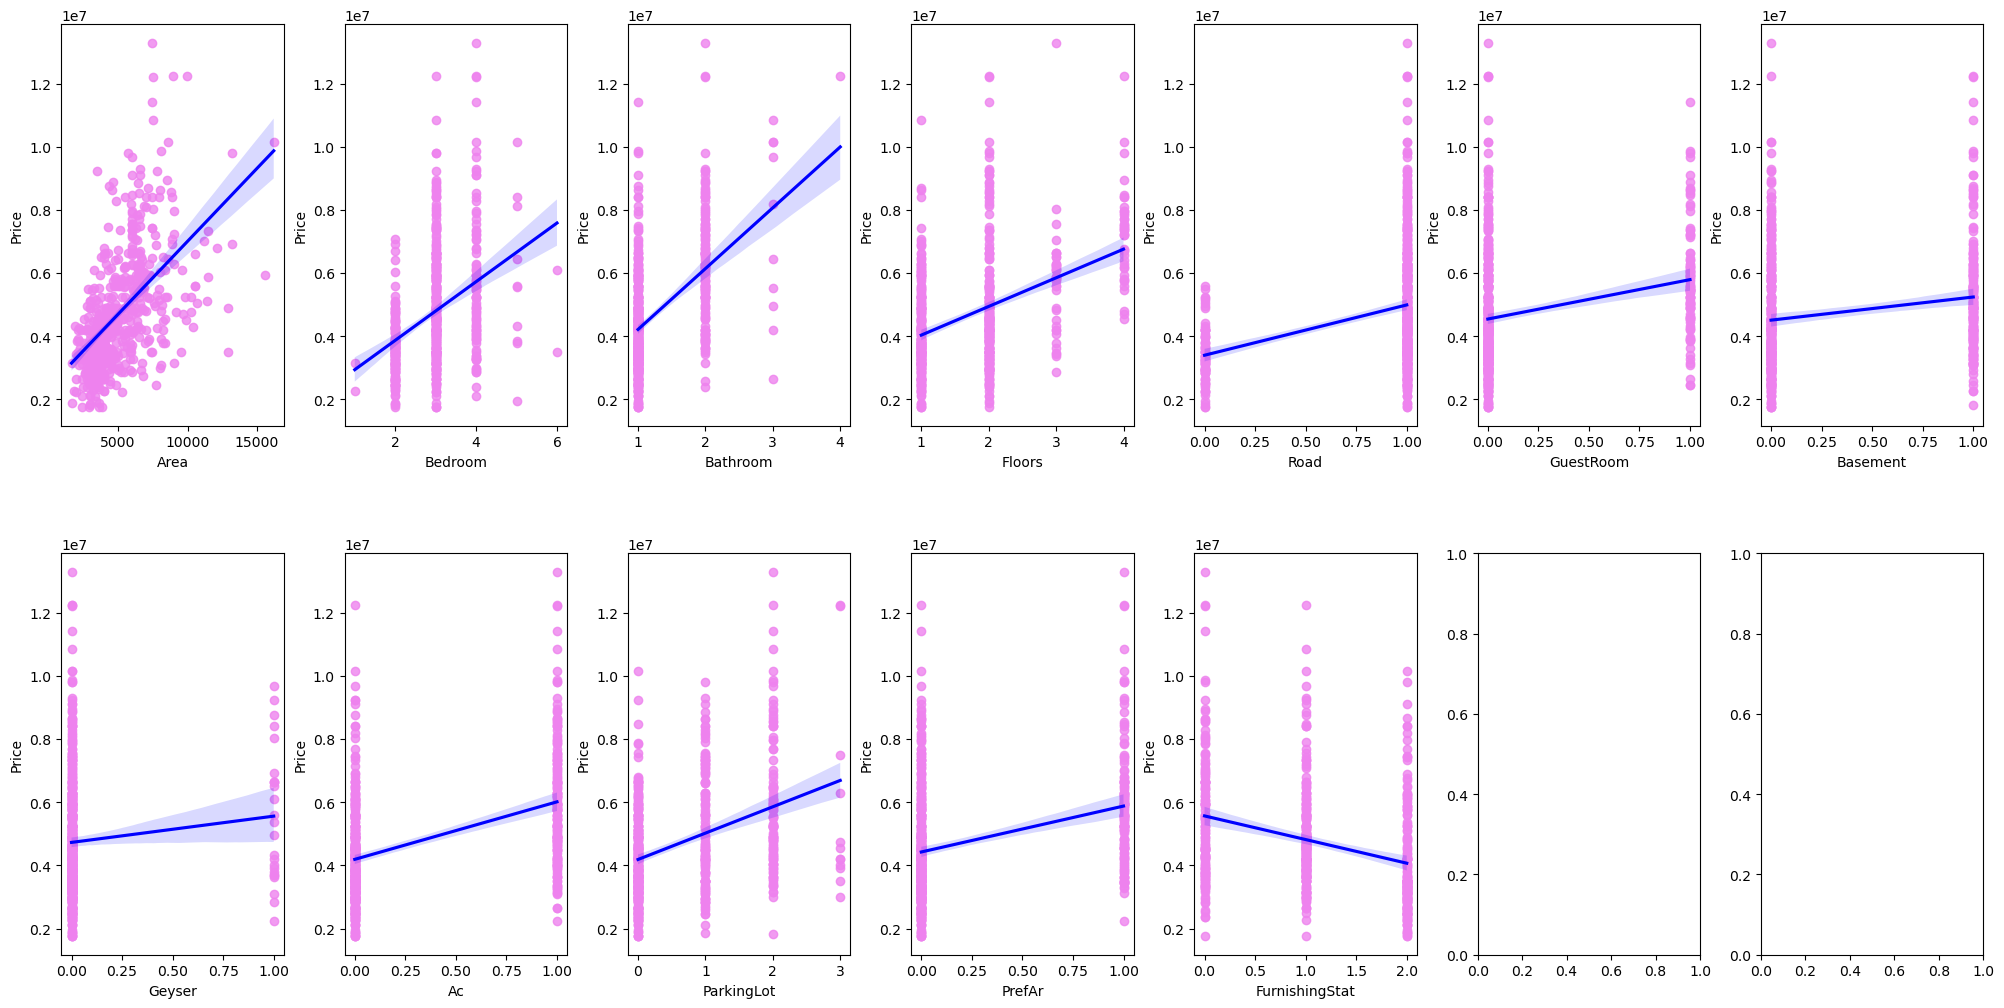

In [17]:
column=['Area','Bedroom','Bathroom', 'Floors', 'Road', 'GuestRoom', 'Basement', 'Geyser', 'Ac', 'ParkingLot', 'PrefAr', 'FurnishingStat']
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for i, k in enumerate(column):
    sns.regplot(y=y, x=x[k], ax=axs[i] ,scatter_kws={"color": "violet"}, line_kws={"color": "blue"})
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<h3>Train Test Split</h3>

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=7)

In [19]:
x_train.shape ,x_test.shape

((436, 12), (109, 12))

In [20]:
y_train.shape , y_test.shape

((436,), (109,))

In [21]:
y_test ,x_test

(542    1750000
 70     6790000
 504    2653000
 221    4767000
 519    2450000
         ...   
 364    3703000
 244    4550000
 453    3150000
 506    2604000
 496    2695000
 Name: Price, Length: 109, dtype: int64,
      Area  Bedroom  Bathroom  Floors  Road  GuestRoom  Basement  Geyser  Ac  \
 542  3620        2         1       1     1          0         0       0   0   
 70   4000        3         2       2     1          0         1       0   1   
 504  3185        2         1       1     1          0         0       0   1   
 221  3420        4         2       2     1          0         0       0   0   
 519  4840        2         1       2     1          0         0       0   0   
 ..    ...      ...       ...     ...   ...        ...       ...     ...  ..   
 364  3120        3         1       2     0          0         1       1   0   
 244  5320        3         1       2     1          1         1       0   0   
 453  3069        2         1       1     1          0         

In [22]:
x_train , y_test

(      Area  Bedroom  Bathroom  Floors  Road  GuestRoom  Basement  Geyser  Ac  \
 505   4000        3         1       2     1          0         0       0   1   
 213   4995        4         2       1     1          0         1       0   0   
 418   3500        4         1       2     1          0         0       0   1   
 278   3400        3         1       2     1          0         1       0   0   
 523   2787        4         2       2     1          0         0       0   0   
 ..     ...      ...       ...     ...   ...        ...       ...     ...  ..   
 211  12900        3         1       1     1          0         0       0   0   
 502   3480        2         1       1     1          0         0       0   0   
 537   1700        3         1       2     1          0         0       0   0   
 196   7686        3         1       1     1          1         1       1   0   
 175   9800        4         2       2     1          1         0       0   0   
 
      ParkingLot  PrefAr  

<h3>Importing Evaluation Module</h3>

In [23]:
#importing Evaluation modules
from sklearn.metrics import r2_score,mean_absolute_error

<h3>Importing LinearRegression Algortihm</h3>

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict = model.predict(x_test)

In [27]:
y_predict

array([2664486.97097026, 6324243.60361591, 3402524.3194886 ,
       4425440.79367473, 3426606.85267275, 8372301.15191738,
       6915000.44684451, 4627875.73418579, 6419891.39211928,
       5115130.58279441, 2972226.32581419, 5170292.2918588 ,
       5886871.40398439, 2658867.17491578, 5025621.7257678 ,
       2049745.04368772, 5927168.90298689, 6126628.97953321,
       4208844.2816198 , 4282547.38352703, 3123829.34403745,
       3971312.80312038, 7546524.2763494 , 4212979.56514   ,
       3983887.23200266, 4426068.04980012, 5227909.02731404,
       2873122.67893063, 4014319.88904173, 5058932.62224965,
       4479902.00823013, 2540851.45777178, 4433130.3893203 ,
       3683923.5609333 , 5802661.47507524, 6585623.15934621,
       3855503.27004827, 8159289.91099897, 6194135.21248639,
       2955974.75192411, 4992646.55727353, 5967092.00061172,
       4862474.88520365, 2904770.84675121, 2010472.20893019,
       6700753.20702881, 5111020.26838933, 2782502.68811426,
       4170192.23094619,

<h3>Score of LinearRegression model & Mean absolute error</h3>

In [31]:
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

print("{}%".format(score*100))
mae

67.69004892376299%


799973.3099355667

<h3>Hence on the analyzed house price prediction data Linear regression give 67% accuracy</h3>

<h2>END</h2>